This jupyter notebook computes the M-R curves and the tidal deformability for the QMC-PS1/2/3/4 relativistic mean field models as published in arxiv:XXX .
If used in colab upload the "input_data" folder as well as tov.py and constants.py as found on https://gitlab.com/ahaber/qmc-psx

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text.latex', preamble = r'\usepackage[helvet]{sfmath} \usepackage{sansmathfonts}')

%config InlineBackend.figure_format = 'retina'

In [2]:
#Load TOV class
from tov import *
from constants import *

In [4]:
#Here we load the QMC-PSX EoSs to be used in calculations computed in arxiv: XXXX. This line if if this notebook is used in google colab! Upload files QMC_PS1.dat,QMC_PS2.dat,QMC_PS3.dat,QMC_PS4.dat from "input_data" folder
eos1 = np.genfromtxt("QMC_PS1.dat", names=True, skip_header=1)
eos2 = np.genfromtxt("QMC_PS2.dat", names=True, skip_header=1)
eos3 = np.genfromtxt("QMC_PS3.dat", names=True, skip_header=1)
eos4 = np.genfromtxt("QMC_PS4.dat", names=True, skip_header=1)



In [ ]:
#Here we load the QMC-PSX EoSs to be used in calculations computed in arxiv: XXXX. This line if if this notebook is used in a local python environment that uses the directory structure found on gitlab!
#uncomment following lines if used in local python environment !

#eos1 = np.genfromtxt("input_data/QMC_PS1.dat", names=True, skip_header=1)
#eos2 = np.genfromtxt("input_data/QMC_PS2.dat", names=True, skip_header=1)
#eos3 = np.genfromtxt("input_data/QMC_PS3.dat", names=True, skip_header=1)
#eos4 = np.genfromtxt("input_data/QMC_PS4.dat", names=True, skip_header=1)


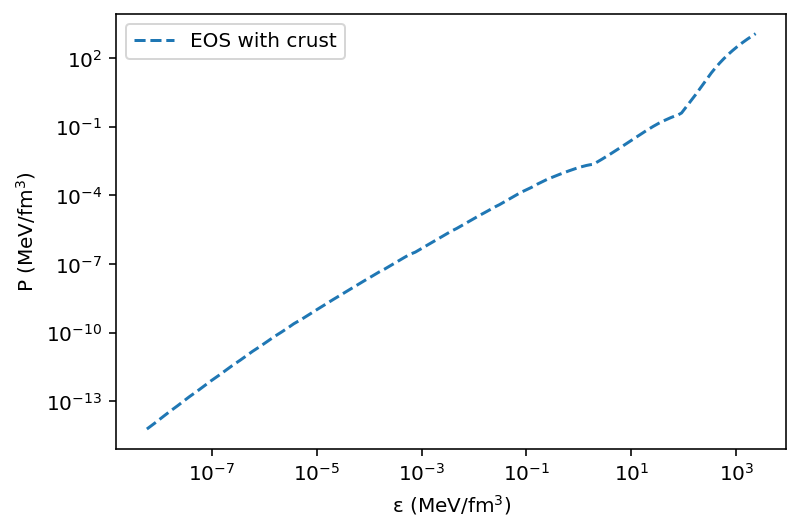

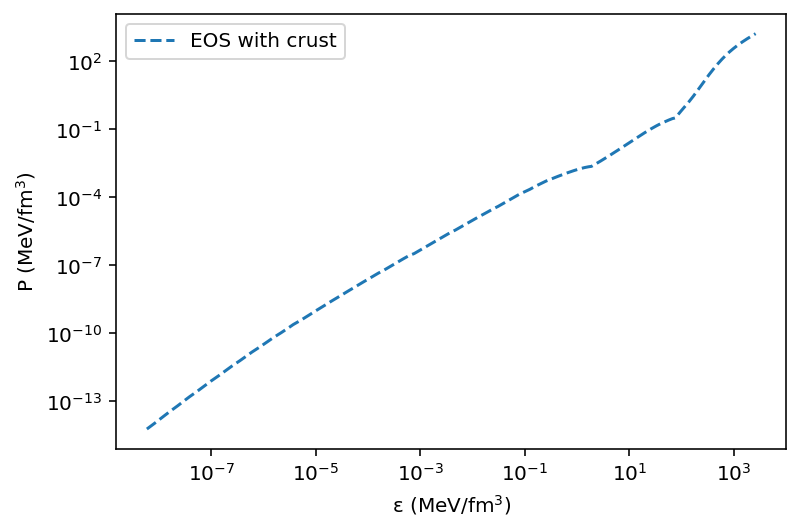

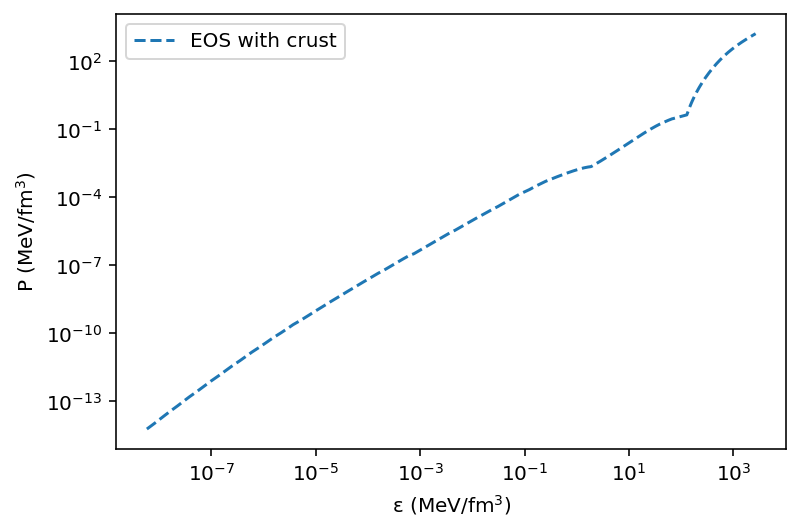

In [ ]:
#create EOS arrays
n_arr1, p_arr1 = eos1["energy_density"], eos1["pressure"]
n_arr2, p_arr2 = eos2["energy_density"], eos2["pressure"]
n_arr3, p_arr3 = eos3["energy_density"], eos3["pressure"]
n_arr4, p_arr4 = eos4["energy_density"], eos4["pressure"]


#initialization of TOVsolver. Crust is included already in QMC-PSX.dat files (TM1e + BPS)
tov_s1 = TOV(n_arr1, p_arr1, plot_eos=True, add_crust=False)
tov_s2 = TOV(n_arr2, p_arr2, plot_eos=True, add_crust=False)
tov_s3 = TOV(n_arr3, p_arr3, plot_eos=True, add_crust=False)
tov_s4 = TOV(n_arr4, p_arr4, plot_eos=True, add_crust=False)


In [ ]:
#Generate M-R curve for QMC-PS1
m_arr1 = []
R_arr1 = []

for dens_c in np.logspace(2.,3.3,200):
    R , M, prof = tov_s1.solve(dens_c, rmax=50e5, dr=100)
    m_arr1.append(M)
    R_arr1.append(R)

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [ ]:
#Generate M-R curve for QMC-PS2
m_arr2 = []
R_arr2 = []

for dens_c in np.logspace(2.,3.3,200):
    R , M, prof = tov_s2.solve(dens_c, rmax=50e5, dr=100)
    m_arr2.append(M)
    R_arr2.append(R)

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [ ]:
#Generate M-R curve for QMC-PS3
m_arr3 = []
R_arr3 = []

for dens_c in np.logspace(2.,3.3,200):
    R , M, prof = tov_s3.solve(dens_c, rmax=50e5, dr=100)
    m_arr3.append(M)
    R_arr3.append(R)

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [ ]:
#Generate M-R curve for QMC-PS4
m_arr4 = []
R_arr4 = []

for dens_c in np.logspace(2.,3.3,200):
    R , M, prof = tov_s4.solve(dens_c, rmax=50e5, dr=100)
    m_arr4.append(M)
    R_arr4.append(R)

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


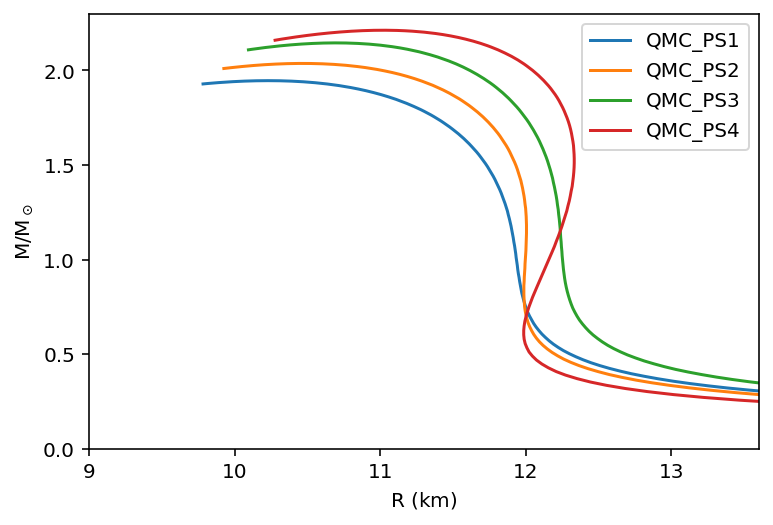

In [ ]:
#Plot all M-R curves
plt.plot(R_arr1, m_arr1, label='QMC_PS1')
plt.plot(R_arr2, m_arr2, label=r'QMC_PS2')
plt.plot(R_arr3, m_arr3, label=r'QMC_PS3')
plt.plot(R_arr4, m_arr4, label=r'QMC_PS4')


plt.xlim(9,13.6)
plt.ylim(0,2.3)

plt.ylabel(r'${\rm M/M_\odot}$')
plt.xlabel(r'${\rm R~(km)}$')

plt.legend(loc=1)
plt.show()

In [ ]:
#Save M-R curves to file
np.savetxt("QMC_PS1_MR.dat", list(zip(R_arr1,m_arr1)), fmt="%s")
np.savetxt("QMC_PS2_MR.dat", list(zip(R_arr2,m_arr2)), fmt="%s")
np.savetxt("QMC_PS3_MR.dat", list(zip(R_arr3,m_arr3)), fmt="%s")
np.savetxt("QMC_PS4_MR.dat", list(zip(R_arr4,m_arr4)), fmt="%s")

In [ ]:
#Compute tidal deformability for QMC-PS1
m_arra = []
R_arra = []

L_arra = []
k2_arra = []
C_arra = []

for dens_c in np.logspace(2.2,3.3,50):
    NS_prop = tov_s1.solve_tidal(dens_c, rmax=50e5)
    R, M, C, k2, y, beta, H = NS_prop[0], NS_prop[1], NS_prop[2], NS_prop[3], NS_prop[4], NS_prop[5], NS_prop[6]
    L_arra.append(2/3*k2/C**5)
    k2_arra.append(k2)
    C_arra.append(C)
    R_arra.append(R)
    m_arra.append(M)

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [ ]:
#Save Lambda(Mass) to file for QMC-PS1
np.savetxt("QMC_PS1_ML.dat", list(zip(m_arra,L_arra)), fmt="%s")

In [ ]:
#Compute tidal deformability for QMC-PS2
m_arrb = []
R_arrb = []

L_arrb = []
k2_arrb = []
C_arrb = []

for dens_c in np.logspace(2.6,3.0,50):
    NS_prop = tov_s2.solve_tidal(dens_c, rmax=50e5)
    R, M, C, k2, y, beta, H = NS_prop[0], NS_prop[1], NS_prop[2], NS_prop[3], NS_prop[4], NS_prop[5], NS_prop[6]
    L_arrb.append(2/3*k2/C**5)
    k2_arrb.append(k2)
    C_arrb.append(C)
    R_arrb.append(R)
    m_arrb.append(M)

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [ ]:
#Save Lambda(Mass) to file for QMC-PS2
np.savetxt("QMC_PS2_ML.dat", list(zip(m_arrb,L_arrb)), fmt="%s")

In [ ]:
#Compute tidal deformability for QMC-PS3
m_arrc = []
R_arrc = []

L_arrc = []
k2_arrc = []
C_arrc = []

for dens_c in np.logspace(2.6,3.2,150):
    NS_prop = tov_s3.solve_tidal(dens_c, rmax=50e5)
    R, M, C, k2, y, beta, H = NS_prop[0], NS_prop[1], NS_prop[2], NS_prop[3], NS_prop[4], NS_prop[5], NS_prop[6]
    L_arrc.append(2/3*k2/C**5)
    k2_arrc.append(k2)
    C_arrc.append(C)
    R_arrc.append(R)
    m_arrc.append(M)


/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [ ]:
#Save Lambda(Mass) to file for QMC-PS3
np.savetxt("QMC_PS3_ML.dat", list(zip(m_arrc,L_arrc)), fmt="%s")

In [ ]:
#Compute tidal deformability for QMC-PS4
m_arrd = []
R_arrd = []

L_arrd = []
k2_arrd = []
C_arrd = []

for dens_c in np.logspace(2.6,2.8,30):
    NS_prop = tov_s4.solve_tidal(dens_c, rmax=50e5)
    R, M, C, k2, y, beta, H = NS_prop[0], NS_prop[1], NS_prop[2], NS_prop[3], NS_prop[4], NS_prop[5], NS_prop[6]
    L_arrd.append(2/3*k2/C**5)
    k2_arrd.append(k2)
    C_arrd.append(C)
    R_arrd.append(R)
    m_arrd.append(M)

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [ ]:
#Save Lambda(Mass) to file for QMC-PS4
np.savetxt("QMC_PS4_ML.dat", list(zip(m_arrd,L_arrd)), fmt="%s")

In [ ]:
#Compute R and M at baryon density = 2 saturation density, corresponding energy density is computed in QMC_PSX.nb
R1 , M1, prof = tov_s1.solve(311.598, rmax=50e5, dr=100)
R2 , M2, prof = tov_s2.solve(311.632, rmax=50e5, dr=100)
R3 , M3, prof = tov_s3.solve(312.594, rmax=50e5, dr=100)
R4 , M4, prof = tov_s4.solve(311.793, rmax=50e5, dr=100)

print(R1,M1)
print(R2,M2)
print(R3,M3)
print(R4,M4)


12.061 0.6537247524831753
12.004 0.698417248753899
12.326 0.7380561486045002
12.07 0.8430308311619125


/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
